<a href="https://colab.research.google.com/github/Deepanshu2440/Huma-Vital-Signs/blob/main/Human_Vital_Signs_Deepanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install --upgrade scikit-learn

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
data = pd.read_csv('Human_vital_signs_R.csv',index_col=0)

In [22]:
display(data)

,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,94.0,21.0,97.0,36.2,Normal
1,1,94.0,25.0,97.0,36.2,Normal
2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...
476,476,56.0,12.0,101.0,33.0,Abnormal
477,477,94.0,25.0,98.0,36.4,Normal
478,478,94.0,21.0,97.0,36.2,Normal
479,479,93.0,27.0,95.0,37.0,Normal


In [23]:
null_counts = data.isnull().sum()
print(null_counts)

Time (s)         0
 HR (BPM)        5
 RESP (BPM)    147
 SpO2 (%)      127
TEMP (*C)        0
OUTPUT           0
dtype: int64


In [24]:
data.fillna(data.median(), inplace=True)

<ipython-input-24-48d8393c03d4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [25]:
null_counts = data.isnull().sum()
print(null_counts)

Time (s)       0
 HR (BPM)      0
 RESP (BPM)    0
 SpO2 (%)      0
TEMP (*C)      0
OUTPUT         0
dtype: int64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

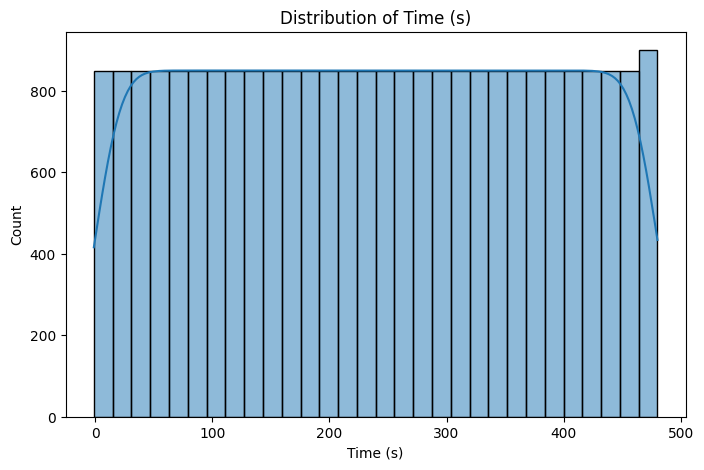

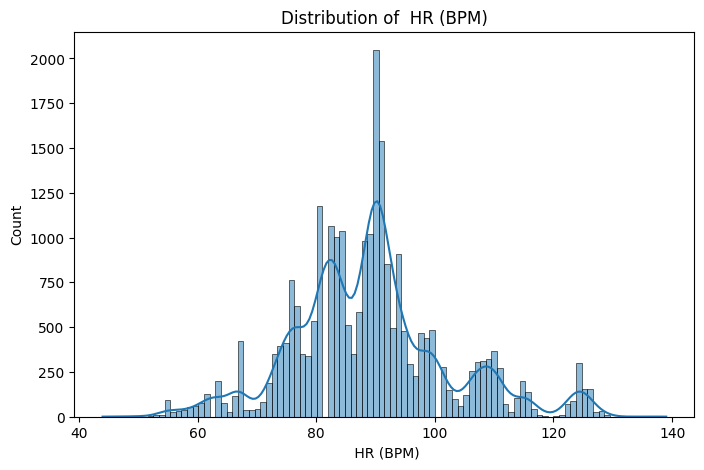

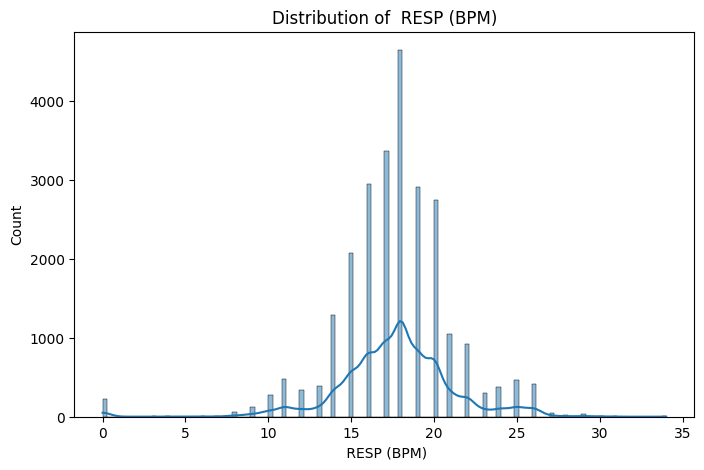

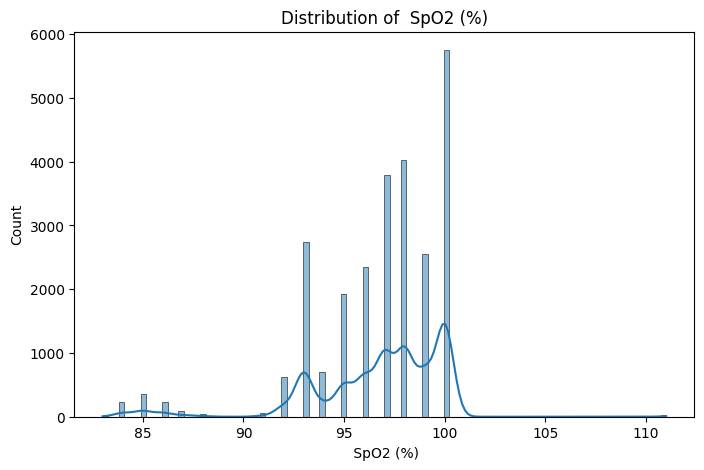

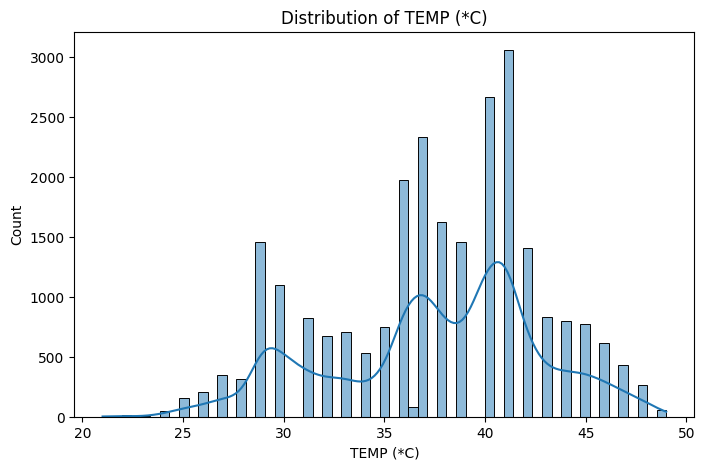

In [27]:
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<ipython-input-28-8dcdbb41a80c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


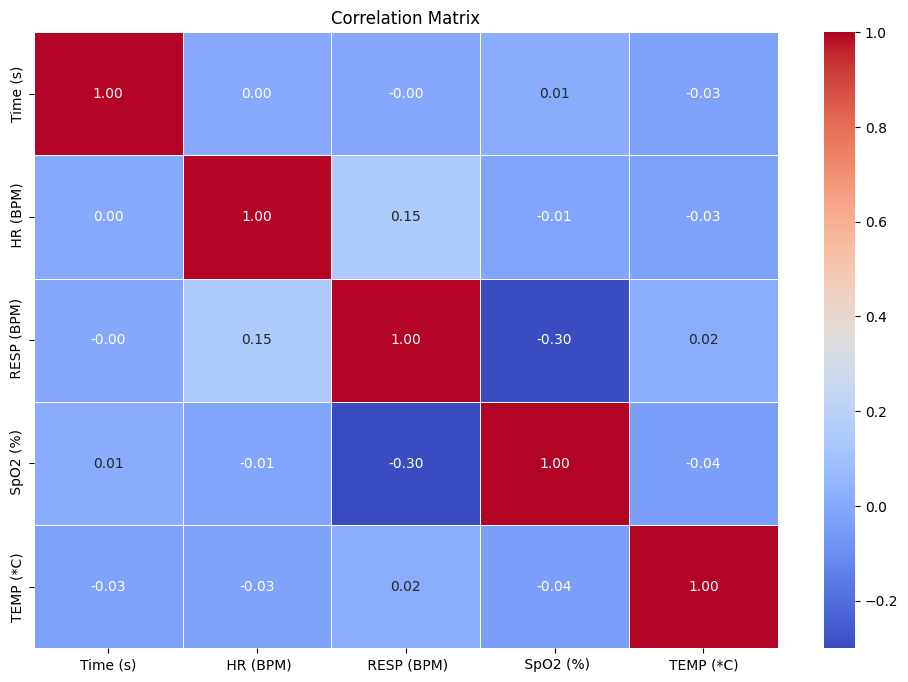

In [28]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
data.columns = ['Time', 'HR', 'RESP', 'SPO2', "TEMP",'OUTPUT']

In [30]:

data.drop(columns=['Time'], inplace=True)

In [31]:
data.head(100)

,HR,RESP,SPO2,TEMP,OUTPUT
0,94.0,21.0,97.0,36.2,Normal
1,94.0,25.0,97.0,36.2,Normal
2,101.0,25.0,93.0,38.0,Abnormal
3,55.0,11.0,100.0,35.0,Abnormal
4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...
95,92.0,23.0,97.0,29.0,Normal
96,93.0,23.0,97.0,29.0,Normal
97,93.0,23.0,97.0,40.0,Abnormal
98,93.0,23.0,97.0,40.0,Abnormal


In [32]:
X = data[['HR', "RESP",'SPO2','TEMP']]

In [33]:
y=data['OUTPUT']

In [34]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Split your features (X) and target (y) variables into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:" , accuracy*100)
print(y_pred)

accuracy: 99.62737791723868
['Normal' 'Abnormal' 'Abnormal' ... 'Normal' 'Normal' 'Abnormal']


In [35]:
new_data = [[100, 13,96,19]]

In [36]:
predictions = clf.predict(new_data)
print("Predicted class labels:", predictions)

Predicted class labels: ['Normal']


In [37]:
import pickle

In [38]:
filename= "remodel.sav"
pickle.dump(clf, open(filename, 'wb'), protocol=4)

In [39]:
#loading the saved model
loaded_model= pickle.load(open('remodel.sav', 'rb'))

In [40]:
new_data = [[90.0, 19.0,94,35]]
predictions = loaded_model.predict(new_data)
print("Your Heartrate and body temperature is", predictions)

Your Heartrate and body temperature is ['Abnormal']
